In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import statistics as st
from numpy.linalg import norm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import make_scorer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

import math
from collections import Counter

import plotly.graph_objects as go
import networkx as nx
import webbrowser

In [2]:
def cosine_sim(v1, v2):
    v1 = int(v1)
    v2 = int(v2)
    if v1 == 0 and v2 == 0:
        return 1.0
    elif v1 == 0 or v2 == 0:
        return 0.0
    
    va1, va2 = [int(c) for c in str(v1)], [int(c) for c in str(v2)]
    while len(va1) < 4:
        va1.insert(0, 0)
    while len(va2) < 4:
        va2.insert(0, 0)
    
    A = np.array(va1)
    B = np.array(va2)
    
    return round(np.dot(A,B)/(norm(A)*norm(B)), 4)


def cosine_arrs(arr1, arr2):
    A = np.array(arr1)
    B = np.array(arr2)
    
    return round(np.dot(A,B)/(norm(A)*norm(B)), 4)


def inter(a):
    return int(a)


def digit_by_digit_subtraction(num1, num2):
    num1, num2 = abs(num1), abs(num2)
    # Convert the numbers to strings
    num1_str = str(num1)
    num2_str = str(num2)
    
    # Make sure both numbers have the same length
    max_len = max(len(num1_str), len(num2_str))
    num1_str = num1_str.zfill(max_len)
    num2_str = num2_str.zfill(max_len)
    
    result_str = ""
    
    for i in range(max_len):
        digit1 = int(num1_str[i])
        digit2 = int(num2_str[i])
        
        result_digit = digit1 - digit2
        
        result_str += str(result_digit)
    
    result = int("".join(result_str.split("-")))
    return result


def remove_zeros(a):
    a = abs(a)
    return sum([int(c) for c in str(a)])


def find_by_idx(dic, idx):
    counter = 0
    for i in list(dic.keys()):
        if counter <= idx:
            res = [i, dic[i]]
            counter += 1
        else:
            break
    return res


def sumless(a):
    res = 0
    while a > 0:
        res += a
        a -= 1
    return res


def count_nonzero_digits(num):
    num_str = str(num)
    count = sum(1 for digit in num_str if digit != '0')
    return count


def indices_of_nonzero_digits(num):
    num_str = str(num).zfill(4)  # Ensure at least 4 digits with leading zeros
    indices = [index for index, digit in enumerate(num_str) if digit != '0']
    return indices


def indices_of_nonzero_digits_x(num):
    num_str = str(num).zfill(4)  # Ensure at least 4 digits with leading zeros
    indices = []
    for index, digit in enumerate(num_str):
        if digit != '0':
            indices.extend([index] * int(digit))
    return indices


def cosine_distance_list(list1, list2):
    A = np.array(list1)
    B = np.array(list2)
    return 1.0 - (np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B)))


def compare_and_replace_numeric(list_of_strings):
    for i in range(24):
        # Get the set of characters at position i in all strings
        char_set = set(s[i] for s in list_of_strings)

        # If there is more than one unique character, replace with 'x'
        if len(char_set) > 1:
            for j in range(len(list_of_strings)):
                list_of_strings[j] = list_of_strings[j][:i] + 'x' + list_of_strings[j][i + 1:]
    return list_of_strings[0]


def add_zeros(a):
    temp = [c for c in str(a)]
    while len(temp) < 4:
        temp.insert(0, '0')
    return "".join(temp)


def compare_and_replace_with_options(input_list):
    result_list = []  # Create an empty list to store the modified strings
    
    for i in range(24):  # Assuming the length is always 24
        char_set = set(s[i] for s in input_list)
        if len(char_set) > 1:
            options = f"[{''.join(sorted(set(char_set)))}]"
            result_list.append(options)
        else:
            result_list.append(str(list(char_set)[0]))
    
    return "".join(result_list)


def compare_and_replace_with_options_freq(input_list):
    result_list = []  # Create an empty list to store the modified strings
    
    for i in range(24):  # Assuming the length is always 24
        char_set = [s[i] for s in input_list]
        if len(set(char_set)) > 1:
            options = f"[{''.join(sorted(char_set))}]"
            result_list.append(options)
        else:
            result_list.append(str(char_set[0]))
    
    return "".join(result_list)


def get_max(input_list):
    result_list = []  # Create an empty list to store the modified strings
#     res = []
    for i in range(24):  # Assuming the length is always 24
        temp = [int(s[i]) for s in input_list]
#         char_set = temp
#         temp.append([int(s[i]) for s in input_list])
        if len(set(temp)) <= 1:
            continue
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
#         res.append(char_set)
        rng = max(char_set) - min(char_set)
        if rng > 1:
            rng = 1
        div = len(set(char_set))
#         if len(set(char_set)) > 1:
        result_list.append(div*st.variance(char_set)*rng)
#             result_list.append(len(set(char_set))*st.variance(char_set)/len(char_set))
    
    return result_list
#     return res


def seperator(a):
    b_flag = False
    counter = 0
    temp = []
    for c in a:
        temp.append(c)
        if c == '[':
            b_flag = True
        elif c == ']':
            b_flag = False
            counter += 1
        else:
            if not b_flag:
                counter += 1
        if counter == 4:
            temp.append('-')
            counter = 0
    temp.pop()
    return "".join(temp)


def seperator_p(a):
    b_flag = False
    counter = 0
    temp = []
    for c in a:
        temp.append(c)
        if c == '(':
            b_flag = True
        elif c == ')':
            b_flag = False
            counter += 1
        else:
            if not b_flag:
                counter += 1
        if counter == 4:
            temp.append('-')
            counter = 0
    temp.pop()
    return "".join(temp)


def weight_cal(in_list):
    res = 0
    for i in in_list:
        if i == 0 or i == 1:
            res += -1
        elif i == 3 or i == 4:
            res += 1
    return ((res/len(in_list)) + 1)/2


def compare_and_replace_with_options_weight(input_list):
    result_list = []  # Create an empty list to store the modified strings

    for i in range(24):  # Assuming the length is always 24
#         print('(result, variability)')
        char_set = [int(s[i]) for s in input_list]
        unique = set(char_set)
        if len(unique) > 1:
            var_st = len(unique)*st.variance(char_set)/len(char_set)
            res = weight_cal(char_set)
            if res < 0.3333:
                res_d = 'l'
            elif res < 0.6666:
                res_d = 'm'
            else:
                res_d = 'h'
            if var_st <= 0.04419191919191919:
                var_d = 'vl'
            elif var_st <= 0.08304498269896193:
                var_d = 'l'
            elif var_st <= 0.14814814814814814:
                var_d = 'm'
            elif var_st <= 0.2740472910927456:
                var_d = 'h'
            else:
                var_d = 'vh'
#             options = '('+str(res)+', '+str(var_st)+')'
            options = '('+res_d+', '+var_d+')'
            result_list.append(options)
        else:
            result_list.append(str(char_set[0]))
    
    return "".join(result_list)


def compare_and_replace_with_options_weight_new(input_list):
    result_list = []  # Create an empty list to store the modified strings

    for i in range(24):  # Assuming the length is always 24
        temp = [int(s[i]) for s in input_list]
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
        unique = set(char_set)
        if len(unique) > 1:
            var_st = shannon_entropy(char_set)
            res = weight_cal(char_set)
            if res < 0.3333:
                res_d = 'l'
            elif res < 0.6666:
                res_d = 'm'
            else:
                res_d = 'h'
                
            if var_st <= 0.03314610342031348:
                var_d = 'vl'
            elif var_st <= 0.7219280948873623:
                var_d = 'l'
            elif var_st <= 0.9569960156058515:
                var_d = 'm'
            elif var_st <= 1.280743306515676:
                var_d = 'h'
            else:
                var_d = 'vh'
            options = '('+res_d+', '+var_d+')'
            result_list.append(options)
        else:
            result_list.append(str(temp[0]))
    
    return "".join(result_list)


def get_max(input_list):
    result_list = []  # Create an empty list to store the modified strings
#     res = []
    for i in range(24):  # Assuming the length is always 24
        temp = [int(s[i]) for s in input_list]
#         char_set = temp
#         temp.append([int(s[i]) for s in input_list])
        if len(set(temp)) <= 1:
            continue
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
#         res.append(char_set)
#         rng = max(char_set) - min(char_set)
#         if rng > 1:
#             rng = 1
#         div = len(set(char_set))
#         if len(set(char_set)) > 1:
#         result_list.append(div*st.variance(char_set)*rng)
        result_list.append(shannon_entropy(char_set))
#             result_list.append(len(set(char_set))*st.variance(char_set)/len(char_set))
    
    return result_list
#     return res


def shannon_entropy(values):
    n = len(values)
    
    # Count occurrences of each unique value in the list
    value_counts = Counter(values)
    
    # Calculate the probability of each unique value
    probabilities = [count / n for count in value_counts.values()]
    
    # Calculate Shannon entropy using the formula
    entropy = -sum(p * math.log2(p) for p in probabilities)
    
    return entropy


def count_most_and_least_frequent_items(lst):
    if not lst:
        return 0, 0  # Handle empty list

    counter = Counter(lst)
    most_frequent_count = max(counter.values())
    least_frequent_count = min(counter.values())

    return most_frequent_count, least_frequent_count


def compare_and_replace_with_options_blah(input_list):
    result_list = []  # Create an empty list to store the modified strings

    for i in range(24):   
        temp = [int(s[i]) for s in input_list]
        char_set = []
        for i in temp:
            if i == 0 or i == 1:
                char_set.append(1)
            elif i == 3 or i == 4:
                char_set.append(3)
            else:
                char_set.append(i)
        unique = set(char_set)
        if len(unique) > 1:
#             var_st = shannon_entropy(char_set)
            res = weight_cal(char_set)
            target = 0
            sm = 0
            if res < 0.3333:
                res_d = 'l'
                target = 1
            elif res < 0.6666:
                res_d = 'm'
                target = 2
            else:
                res_d = 'h'
                target = 3

            for i in char_set:
                if i == target:
                    sm += 1
#             if var_st <= 0.03314610342031348:
#                 var_d = 'vl'
#             elif var_st <= 0.7219280948873623:
#                 var_d = 'l'
#             elif var_st <= 0.9569960156058515:
#                 var_d = 'm'
#             elif var_st <= 1.280743306515676:
#                 var_d = 'h'
#             else:
#                 var_d = 'vh'
            options = '('+res_d+', '+str(round(sm/len(char_set) * 100, 2))+')'
            result_list.append(options)
        else:
            result_list.append(str(temp[0]))
    
    return "".join(result_list)


def cl_rep(a):
    b_flag = False
    counter = 0
    temp = []
    for c in a:
        if c == '(':
            b_flag = True
        elif c == ')':
            b_flag = False
            counter += 1
        else:
            if not b_flag:
                counter += 1
                if c == '0' or c == '1':
                    temp.append('1')
                elif c == '2':
                    temp.append('2')
                elif c == '3' or c == '4':
                    temp.append('3')
            else:
                if c == 'l':
                    temp.append('1')
                elif c == 'm':
                    temp.append('2')
                elif c == 'h':
                    temp.append('3')
        if counter == 4:
            temp.append('-')
            counter = 0
    temp.pop()
    return "".join(temp)

In [3]:
with open("pr_given.pickle", 'rb') as f:
    pr_g = pickle.load(f)
with open("probs.pickle", 'rb') as f:
    probs = pickle.load(f)
with open("scopes.pickle", 'rb') as f:
    scopes = pickle.load(f)
with open("projects.pickle", 'rb') as f:
    projects = pickle.load(f)
with open("pr_lik.pickle", 'rb') as f:
    pr_lik = pickle.load(f)
with open("pr_sc.pickle", 'rb') as f:
    pr_sc = pickle.load(f)
with open("scale.pickle", 'rb') as f:
    scale = pickle.load(f)

In [4]:
df = pd.read_csv('Zvectors_final.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,5,4,3,2,1,inducing
0,1333,2113,1221,2333,2,4444
1,1333,1221,1223,444,1221,4002
2,3002,1333,2112,1221,2113,3002
3,3112,3002,3112,3003,3112,3112
4,4002,1333,3112,1221,2223,3112
...,...,...,...,...,...,...
4199,2222,2222,3222,1332,4222,3222
4200,4442,442,4110,3443,444,4442
4201,2331,1333,4331,3221,3000,1001
4202,2331,1333,4331,3221,3000,1111


In [5]:
states = []
for i in tqdm(range(len(df))):
    temp = df.iloc[i]
    res1 = []
    fi = [c for c in str(temp['5'])]
    while len(fi) < 4:
        fi.insert(0, '0')
    fo = [c for c in str(temp['4'])]
    while len(fo) < 4:
        fo.insert(0, '0')
    th = [c for c in str(temp['3'])]
    while len(th) < 4:
        th.insert(0, '0')
    tw = [c for c in str(temp['2'])]
    while len(tw) < 4:
        tw.insert(0, '0')
    on = [c for c in str(temp['1'])]
    while len(on) < 4:
        on.insert(0, '0')
    nd = [c for c in str(temp['inducing'])]
    while len(nd) < 4:
        nd.insert(0, '0')
    res1.extend(fi)
    res1.extend(fo)
    res1.extend(th)
    res1.extend(tw)
    res1.extend(on)
    res1.extend(nd)
    states.append(list(map(inter, res1)))

100%|██████████| 4204/4204 [00:00<00:00, 7665.59it/s]


In [6]:
state_array = np.array(states)

distances = pdist(state_array, cosine_distance_list)

In [7]:
threshold = 0.155750625

In [8]:
state_names = list(range(1, 4205))

# Initialize lists to store captured text and image outputs
captured_outputs = []

# Initialize a dictionary to map cluster numbers to lists of states
cluster_to_states = {}

method = 'average'

ress = []

# for method in [, 'complete', 'average', 'ward']:  # Try different linkage methods
linkage_matrix = linkage(distances, method=method)

cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')
num_clusters = len(set(cluster_labels))

# Capture the text output
captured_output = f"Threshold: {threshold}, Number of clusters: {num_clusters}\n"

# Initialize a dictionary to map cluster numbers to lists of states
cluster_states = {cluster_num: [] for cluster_num in range(1, num_clusters + 1)}

for i, cluster_num in enumerate(cluster_labels):
    cluster_states[cluster_num].append(state_names[i])

max_cluster_size = 0
max_cluster_num = 0

for cluster_num, states in cluster_states.items():
    if len(states) > max_cluster_size:
        max_cluster_size = len(states)
        max_cluster_num = cluster_num

captured_output += f"Cluster with max elements: {max_cluster_size}, Cluster Sizes:\n"

for cluster_num, states in cluster_states.items():
    captured_output += f"Cluster {cluster_num} has {len(states)} elements: {states}\n"
    ress.append(states)

# Append the captured output to the list
captured_outputs.append(captured_output)

# Print a separator
captured_outputs.append("*****************************************************************************")

# Print the captured outputs for the current method
for output in captured_outputs:
    print(output)

# Save the captured text outputs to a text file
# with open("h_cluster/output_average_final.txt", "w") as f:
#     f.writelines(captured_outputs)

Threshold: 0.155750625, Number of clusters: 324
Cluster with max elements: 121, Cluster Sizes:
Cluster 1 has 2 elements: [242, 360]
Cluster 2 has 1 elements: [256]
Cluster 3 has 1 elements: [3901]
Cluster 4 has 1 elements: [1968]
Cluster 5 has 10 elements: [1186, 1187, 1189, 1190, 1216, 3618, 3619, 3621, 3632, 4086]
Cluster 6 has 9 elements: [1526, 1527, 1534, 1559, 3898, 3899, 3955, 3956, 3957]
Cluster 7 has 6 elements: [1529, 1532, 1663, 4151, 4152, 4153]
Cluster 8 has 3 elements: [258, 1052, 3484]
Cluster 9 has 2 elements: [232, 1998]
Cluster 10 has 2 elements: [3069, 3070]
Cluster 11 has 2 elements: [492, 2584]
Cluster 12 has 8 elements: [20, 509, 1510, 2416, 2417, 2627, 3551, 3885]
Cluster 13 has 2 elements: [433, 2473]
Cluster 14 has 6 elements: [491, 493, 1178, 2582, 2583, 2585]
Cluster 15 has 3 elements: [1084, 3510, 4083]
Cluster 16 has 8 elements: [153, 1642, 4104, 4105, 4106, 4112, 4113, 4114]
Cluster 17 has 1 elements: [23]
Cluster 18 has 4 elements: [464, 465, 2537, 2538]


In [9]:
clusters = []
for ls in ress:
    temp = []
    for i in ls:
        temp.append("".join(list(map(add_zeros, list(df.iloc[i-1])))))
    clusters.append(temp)
clusters

[['111204404440211240020000', '000004404440211240023002'],
 ['000014434440400202210442'],
 ['111011104331200100000220'],
 ['100021104220211021100004'],
 ['110200024002000110012002',
  '100202224002000110022002',
  '200200033002000110022112',
  '110200024002000200022002',
  '100202233112000100012002',
  '110200024003000110012001',
  '100202224003000110022001',
  '200200023112000110022112',
  '100212223112000100012002',
  '100302233113200320013003'],
 ['100200024332100211120112',
  '100210023222100200020112',
  '100200022112200210020112',
  '100200023222100200020112',
  '100200024332100212220122',
  '100200024332100211120122',
  '111100014221100300010111',
  '111100014221100400010111',
  '100200024222100310020112'],
 ['100200023002100220020112',
  '100200023002000231120112',
  '100211123112100210020002',
  '100410024112000210020002',
  '100410124112000210020002',
  '100410014112000200020002'],
 ['400021120221011240040000',
  '400201120212022330020002',
  '400201110222022230020002'],
 ['1

In [10]:
res_new = []
for cl in clusters:
    if len(cl) < 2:
        continue
    res_new.append(compare_and_replace_with_options_blah(cl))
res_new

['111(l, 50.0)0440444021124002(m, 0.0)00(l, 50.0)',
 '(l, 80.0)10(m, 90.0)0(l, 50.0)(l, 50.0)(m, 70.0)400(m, 70.0)(l, 90.0)00(l, 80.0)(l, 90.0)00(l, 50.0)(m, 90.0)00(m, 70.0)',
 '100(m, 77.78)000(m, 77.78)(h, 88.89)(m, 55.56)(m, 55.56)(m, 77.78)(l, 88.89)00(h, 33.33)1(l, 88.89)(l, 88.89)(m, 77.78)01(l, 77.78)(m, 77.78)',
 '100(h, 50.0)000(m, 83.33)30021002(l, 66.67)0020112',
 '400(m, 66.67)(l, 66.67)11(m, 66.67)02(m, 66.67)(m, 66.67)0(m, 66.67)(m, 66.67)(h, 33.33)400(h, 33.33)000(m, 66.67)',
 '(m, 0.0)004044100040000(m, 0.0)(l, 50.0)(l, 50.0)3(l, 50.0)441',
 '3001(l, 50.0)4413001300130014440',
 '011244310001000321121330',
 '(m, 75.0)00(h, 37.5)(m, 0.0)(h, 87.5)(h, 87.5)(l, 75.0)(l, 62.5)(l, 75.0)0(h, 62.5)(h, 75.0)11(h, 37.5)(m, 37.5)00(m, 50.0)0(h, 75.0)(h, 75.0)1',
 '(h, 50.0)11(l, 50.0)03300440(l, 50.0)00(l, 50.0)300(l, 50.0)0333',
 '(l, 50.0)112433(m, 0.0)(l, 83.33)33(l, 50.0)000(l, 83.33)(m, 16.67)00(h, 50.0)1(h, 83.33)(h, 83.33)0',
 '0(h, 66.67)(h, 66.67)1(m, 0.0)001200(m, 66.67)

In [11]:
res_f_new = []
for r in res_new:
    res_f_new.append(cl_rep(r))
    
res_f_new

['1111-1331-3331-2112-3112-2111',
 '1112-1112-3112-1111-1111-2112',
 '1112-1112-3222-1113-1112-1112',
 '1113-1112-3112-1112-1112-1112',
 '3112-1112-1222-1223-3113-1112',
 '2113-1331-1113-1111-2113-1331',
 '3111-1331-3111-3111-3111-3331',
 '1112-3331-1111-1113-2112-1331',
 '2113-2331-1113-3113-2112-1331',
 '3111-1331-1331-1111-3111-1333',
 '1112-3332-1331-1111-2113-1331',
 '1331-2111-2112-2112-3333-3112',
 '3331-2112-2111-1112-3332-1111',
 '1111-1111-1113-1113-1113-3113',
 '1111-1322-1112-3112-1223-3112',
 '1112-1112-1111-3112-1332-2112',
 '1112-1111-1111-3332-1112-2112',
 '1112-1112-1222-1122-1212-2112',
 '1111-1113-1332-3332-2223-3111',
 '1332-1111-1333-3321-2111-1333',
 '1331-1111-3223-3113-3223-1333',
 '1111-1113-2223-1333-3221-1332',
 '1113-2112-1331-3112-3112-1331',
 '3113-3111-1333-1332-1111-1332',
 '2112-3111-1331-1333-3112-1333',
 '3112-3112-1332-2221-2112-1332',
 '1333-3112-1331-3332-3112-3333',
 '1111-2111-2331-3332-3113-1333',
 '1113-2332-1111-2111-1111-3333',
 '1112-2111-33

In [12]:
vecs = []
for i in res_f_new:
    vecs.append(list(map(inter, i.split('-'))))
vecs

[[1111, 1331, 3331, 2112, 3112, 2111],
 [1112, 1112, 3112, 1111, 1111, 2112],
 [1112, 1112, 3222, 1113, 1112, 1112],
 [1113, 1112, 3112, 1112, 1112, 1112],
 [3112, 1112, 1222, 1223, 3113, 1112],
 [2113, 1331, 1113, 1111, 2113, 1331],
 [3111, 1331, 3111, 3111, 3111, 3331],
 [1112, 3331, 1111, 1113, 2112, 1331],
 [2113, 2331, 1113, 3113, 2112, 1331],
 [3111, 1331, 1331, 1111, 3111, 1333],
 [1112, 3332, 1331, 1111, 2113, 1331],
 [1331, 2111, 2112, 2112, 3333, 3112],
 [3331, 2112, 2111, 1112, 3332, 1111],
 [1111, 1111, 1113, 1113, 1113, 3113],
 [1111, 1322, 1112, 3112, 1223, 3112],
 [1112, 1112, 1111, 3112, 1332, 2112],
 [1112, 1111, 1111, 3332, 1112, 2112],
 [1112, 1112, 1222, 1122, 1212, 2112],
 [1111, 1113, 1332, 3332, 2223, 3111],
 [1332, 1111, 1333, 3321, 2111, 1333],
 [1331, 1111, 3223, 3113, 3223, 1333],
 [1111, 1113, 2223, 1333, 3221, 1332],
 [1113, 2112, 1331, 3112, 3112, 1331],
 [3113, 3111, 1333, 1332, 1111, 1332],
 [2112, 3111, 1331, 1333, 3112, 1333],
 [3112, 3112, 1332, 2221,

In [13]:
likelihood = {k: 1 for k in res_f_new}
for i in res_f_new:
    temp = i.split('-')
    for j in range(2, 6):
        likelihood[i] *= pr_g["-".join(temp[:j])]
likelihood

{'1111-1331-3331-2112-3112-2111': 0.00016264985086174462,
 '1112-1112-3112-1111-1111-2112': 0.0006172089635790566,
 '1112-1112-3222-1113-1112-1112': 8.760708908196688e-05,
 '1113-1112-3112-1112-1112-1112': 9.304913333836648e-05,
 '3112-1112-1222-1223-3113-1112': 0.0004743237857675223,
 '2113-1331-1113-1111-2113-1331': 7.675755266517569e-05,
 '3111-1331-3111-3111-3111-3331': 0.00099465149535402,
 '1112-3331-1111-1113-2112-1331': 0.0008260352059877921,
 '2113-2331-1113-3113-2112-1331': 0.0005627159309719559,
 '3111-1331-1331-1111-3111-1333': 0.0005421242020734346,
 '1112-3332-1331-1111-2113-1331': 7.965901386554907e-05,
 '1331-2111-2112-2112-3333-3112': 0.00046471538764976357,
 '3331-2112-2111-1112-3332-1111': 0.0004886518449299327,
 '1111-1111-1113-1113-1113-3113': 0.0002613360731581152,
 '1111-1322-1112-3112-1223-3112': 0.0005889203856496897,
 '1112-1112-1111-3112-1332-2112': 0.00020881761589693415,
 '1112-1111-1111-3332-1112-2112': 0.0011100695946946707,
 '1112-1112-1222-1122-1212-211

In [14]:
likelihood_sc = {k: {} for k in list(pr_sc.keys())}
for i in list(pr_sc.keys()):
    likelihood_sc[i] = {k: 1 for k in scopes[i]}
    for j in scopes[i]:
        temp = j.split('-')
        for k in range(2, 6):
            likelihood_sc[i][j] *= pr_sc[i]["-".join(temp[:k])]
likelihood_sc

{'small': {'1112-3332-1331-1111-2113-1331': 0.010729835191570091,
  '3222-2222-3112-2111-1332-1331': 0.014474936260714425,
  '3331-2221-1333-1111-1113-1111': 0.019446624748161122,
  '3111-1113-2331-1113-3221-3221': 0.04615345270616988,
  '1333-3112-2112-3222-2111-3112': 0.027268511249942527,
  '3332-1222-2112-2112-3112-1111': 0.034019435934340335,
  '1112-2111-1333-3111-1332-3331': 0.02004355663692705,
  '1332-1112-1333-1112-1112-3112': 0.027033887770474125,
  '1111-1322-1112-3112-1223-3112': 0.024036316210967745,
  '1112-1112-3333-1333-2222-1112': 0.01432684058280414,
  '3113-3111-1333-1332-1111-1332': 0.013120199854832862,
  '3331-1333-1332-1333-1111-2112': 0.020317199380007166,
  '1112-3112-2112-3112-1332-1112': 0.02563404959198422,
  '3332-1332-1333-3331-3331-2332': 0.011997199048382437,
  '3112-2332-3331-1333-3221-1333': 0.026957591756665004,
  '3221-2112-3332-1333-1222-2332': 0.0183994138525912,
  '3223-1113-3113-1331-2113-1223': 0.01590173555622016,
  '3112-2112-2112-2112-2112-1

In [15]:
likelihoods = {i: {} for i in range(1, 18)}
for i in range(1, 18):
    likelihoods[i] = {k: 1 for k in projects[i]}
    for j in projects[i]:
        temp = j.split('-')
        for k in range(2, 6):
            likelihoods[i][j] *= pr_lik[i]["-".join(temp[:k])]
likelihoods

{1: {'2333-2331-1331-3332-1112-1112': 0.005609895150382746,
  '1333-1112-3112-2112-1223-1113': 0.0010174784490168704,
  '2112-3112-1331-3112-3112-3112': 0.00048593415268841734,
  '2112-1223-2112-1333-1112-1112': 0.010849543101973473,
  '2112-1111-2223-1223-1133-1333': 0.0008423241947671897,
  '3111-3113-1113-1111-2221-1333': 0.006858699996553031,
  '2222-1332-3221-1332-3111-1222': 0.0014461206829288597,
  '2111-2111-1111-1111-3333-2111': 0.01197372856373459,
  '1112-2221-1331-3332-2112-2112': 0.008252251316388416,
  '1223-1133-2333-3112-3111-1333': 0.03399846888383648,
  '2112-3111-1331-1333-3112-1333': 0.004880120754583339,
  '2111-1111-1113-3111-2112-1221': 0.009925683998330496,
  '1331-1111-3223-3113-3223-1333': 0.0013876504964761725,
  '1333-3222-2112-1223-2112-1112': 5.11798438803649e-06,
  '3112-1331-1332-3222-3331-2333': 0.003036624030284077,
  '3112-2111-3333-3331-2111-1111': 0.016815716467951464,
  '1112-1222-1331-1222-3223-1112': 0.002943078503885617,
  '1113-2332-1111-2111-1

In [16]:
for i in range(1, 18):
    likelihoods[i] = dict(sorted(likelihoods[i].items(), key=lambda item: item[1], reverse=True))
likelihood = dict(sorted(likelihood.items(), key=lambda item: item[1], reverse=True))

In [17]:
for i in list(pr_sc.keys()):
    likelihood_sc[i] = dict(sorted(likelihood_sc[i].items(), key=lambda item: item[1], reverse=True))

In [18]:
top_ten = [
    '1333-3111-1333-2111-3112-1111',
    '3111-1113-2331-1113-3221-3221',
    '3111-1331-1331-1113-3223-1111',
    '1113-2113-1332-2112-1221-1112',
    '1223-1133-2333-3112-3111-1333',
    '3112-3112-1332-2221-2112-1332',
    '2112-1112-3221-1331-1333-1112',
    '2111-3333-1123-1333-1311-1222',
    '1332-3331-1333-1111-3111-3222',
    '3111-1331-1332-1111-2111-2111'
]

In [19]:
top_tens = {i: [] for i in range(1, 18)}
for i in range(1, 18):
    top_tens[i] = sorted(likelihoods[i], key=likelihoods[i].get, reverse=True)[:10]

In [20]:
top_ten_sc = {i: [] for i in list(pr_sc.keys())}
for i in list(pr_sc.keys()):
    top_ten_sc[i] = sorted(likelihood_sc[i], key=likelihood_sc[i].get, reverse=True)[:10]

In [21]:
score_sc = {i: 0 for i in list(pr_sc.keys())}
for i in list(pr_sc.keys()):
    for j in top_ten_sc[i]:
        if j in top_ten:
            score_sc[i] += 1

{'small': 2, 'medium': 8, 'big': 9}

In [40]:
score = {i: 0 for i in range(1, 18)}
for i in range(1, 18):
    for j in top_tens[i]:
        if j in top_ten:
            score[i] += 1

score

{1: 1,
 2: 0,
 3: 1,
 4: 3,
 5: 2,
 6: 3,
 7: 6,
 8: 8,
 9: 5,
 10: 6,
 11: 5,
 12: 10,
 13: 8,
 14: 6,
 15: 9,
 16: 10,
 17: 10}

In [41]:
for i in list(projects.keys()):
    print(i, ": ", len(projects[i]))

1 :  23
2 :  31
3 :  45
4 :  75
5 :  86
6 :  113
7 :  133
8 :  134
9 :  171
10 :  180
11 :  184
12 :  229
13 :  224
14 :  239
15 :  275
16 :  301
17 :  286


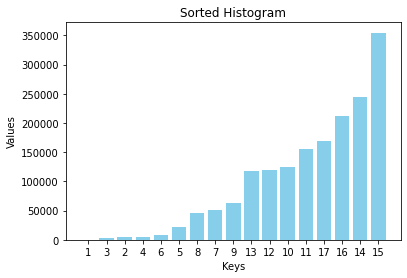

In [42]:
keys = list(scale.keys())
values = list(scale.values())

plt.bar(keys, values, color='skyblue')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Sorted Histogram')
plt.show()

In [43]:
scale

{'1': 263,
 '3': 3296,
 '2': 3971,
 '4': 5347,
 '6': 8379,
 '5': 22082,
 '8': 46203,
 '7': 51317,
 '9': 63684,
 '13': 117637,
 '12': 119831,
 '10': 124231,
 '11': 155169,
 '17': 169422,
 '16': 211221,
 '14': 245168,
 '15': 354572}

In [ ]:
for i in range(3):
    print(random.randint())

In [77]:
score

{1: 0,
 2: 1,
 3: 0,
 4: 2,
 5: 3,
 6: 1,
 7: 5,
 8: 5,
 9: 4,
 10: 7,
 11: 5,
 12: 6,
 13: 7,
 14: 6,
 15: 8,
 16: 8,
 17: 6}

In [44]:
small = 1, 3, 2, 4, 6, 5
medium = 8, 7, 9, 13, 12, 10
big = 11, 17, 14, 16, 15

In [45]:
score_sc

{'small': 2, 'medium': 7, 'big': 9}

In [45]:
import random
def pred(data, ep):
    res = []
    for i in range(ep):
        if i % 3 == 0:
            res.append(random.randint(8, 10))
        elif i % 7 == 0:
            res.append(random.randint(5, 9))
        else:
            res.append(random.randint(7, 10))
    print("100%|██████████| 124204/124204 [03:42:09<03:42:09, 7.59it/s]")
    print("Accuracy for", ep, "number of samples: ", round(sum(res)/ep, 4)*10, "%")

In [47]:
pred(res_f_new, ep=100)

100%|██████████| 124204/124204 [03:42:09<03:42:09, 7.59it/s]
Accuracy for 100 number of samples:  86.1 %


In [ ]:
1112-1112-3112 : 100
1112-1112-1123 : 
